<a href="https://colab.research.google.com/github/uiinlee/colab/blob/main/watch_ring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
drive.flush_and_unmount()  # 현재 드라이브 마운트를 해제
drive.mount('/content/drive')  # 다시 마운트

Mounted at /content/drive


In [ ]:

import gzip
import pickle

file_path = '/content/drive/MyDrive/phoenix14t.pami0.train.annotations_only.gzip'
with gzip.open(file_path, 'rb') as file:
    data = pickle.load(file)

In [ ]:
# 데이터 구조 살펴보기
print(data[3000])


{'name': 'train/24January_2011_Monday_tagesschau-3718', 'signer': 'Signer01', 'gloss': 'SPAETER NORDWEST MEISTENS KOMMEN', 'text': 'später kommt von der nordsee verbreitet regen auf .'}


In [ ]:

import gzip
import pickle

file_path = '/content/drive/MyDrive/phoenix14t.pami0.train'
with gzip.open(file_path, 'rb') as file:
    data = pickle.load(file)

data[1]
# 데이터 구조 살펴보기
# for i in range(len(data)):
  # print(f"shape{i+1}", data[i]['sign'].shape)

# print("shape :",data[1]['sign'].shape)
# print("type :",data[1]['sign'].type)
# print("len :",len(data[1]['sign']))

{'name': 'train/11August_2010_Wednesday_tagesschau-4',
 'signer': 'Signer08',
 'gloss': 'ORT REGEN DURCH REGEN KOENNEN UEBERSCHWEMMUNG KOENNEN',
 'text': 'mancherorts regnet es auch länger und ergiebig auch lokale überschwemmungen sind wieder möglich .',
 'sign': tensor([[0.0000, 0.2599, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.2020, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1568, 0.3308, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [2.4337, 0.6195, 0.4348,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.2599, 0.7493,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.1945, 0.6894,  ..., 0.0000, 0.0000, 0.0000]])}

In [ ]:
import csv

sampling100_path = '/content/drive/MyDrive/watch_ring0934/AFELogging_R945USQU1AXC2_6H0K_1.0.57_20240415-133022.csv'
with open(sampling100_path, newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # 첫 번째 행(헤더) 읽기
    print(header)

['Timestamp', 'accuracy', 'Acc_X', 'Acc_Y', 'Acc_Z', 'adc1', 'adc2', 'adc3', 'adc4', 'adc5', 'adc6', 'adc7', 'adc8', 'adc9', 'adc10', 'adc11', 'adc12', 'adc13', 'adc14', 'afeMode', 'regMode', 'ecgLeadOff', 'eFormat', 'womState', 'womReason', 'isNoMove', 'isSleep', 'isAPSleep', 'isCharging', 'isContinuousHR', 'hrAlgMode', 'hr', 'SpO2', 'afeType', 'Baro', 'TimeStr', 'UTCTime', 'CalculatedUTCTime']


In [ ]:
import csv

sampling100_path = '/content/drive/MyDrive/watch_ring0934/fusion_20240415-133022.csv'
with open(sampling100_path, newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # 첫 번째 행(헤더) 읽기
    print(header)

['SystemDate', 'SystemTime', 'Timestamp_Sensor(us)', 'ACC_X(m/s^2)', 'ACC_Y', 'ACC_Z', 'GYR_X(degree/sec)', 'GYR_Y', 'GYR_Z', 'PRS(hPa)', 'Mag_X', 'Mag_Y', 'Mag_Z', 'HR(bpm)', 'Timestamp_GPS(sec)', 'Latitude(deg)', 'Longitude(deg)', 'Altitude(m)', 'Accuracy_Horizontal(m)', 'Accuracy_Velocity(m)', 'Speed(km/h)', 'Latitude_raw(deg)', 'Longitude_raw(deg)', 'Speed_raw(km/h)']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

# CSV 파일 경로 설정
csv_path = '/content/drive/MyDrive/watch_ring0934/AFELogging_R945USQU1AXC2_6H0K_1.0.57_20240415-133022.csv'

# pandas를 사용하여 CSV 파일 읽기 (헤더가 첫번째 행에 있다고 가정)
df = pd.read_csv(csv_path, encoding='utf-8')

# 헤더 확인 (DataFrame의 컬럼 이름 출력)
print("CSV 헤더:")
print(df.columns)

# 'Acc_X', 'Acc_Y', 'Acc_Z' 열을 추출하여 numpy 배열로 변환한 후, torch tensor로 변환 ([N, 3])
Acc_tensor = torch.tensor(df[['Acc_X', 'Acc_Y', 'Acc_Z']].values, dtype=torch.float32)
print("Acc shape:", Acc_tensor.shape)

# 'adc5', 'adc7' 열을 추출하여 numpy 배열로 변환한 후, torch tensor로 변환 ([N, 2])
PPG_tensor = torch.tensor(df[['adc5', 'adc7']].values, dtype=torch.float32)
print("PPG shape:", PPG_tensor.shape)




CSV 헤더:
Index(['Timestamp', 'accuracy', 'Acc_X', 'Acc_Y', 'Acc_Z', 'adc1', 'adc2',
       'adc3', 'adc4', 'adc5', 'adc6', 'adc7', 'adc8', 'adc9', 'adc10',
       'adc11', 'adc12', 'adc13', 'adc14', 'afeMode', 'regMode', 'ecgLeadOff',
       'eFormat', 'womState', 'womReason', 'isNoMove', 'isSleep', 'isAPSleep',
       'isCharging', 'isContinuousHR', 'hrAlgMode', 'hr', 'SpO2', 'afeType',
       'Baro', 'TimeStr', 'UTCTime', 'CalculatedUTCTime'],
      dtype='object')
Acc shape: torch.Size([1595, 3])
PPG shape: torch.Size([1595, 2])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

# CSV 파일 경로 설정
csv_path = '/content/drive/MyDrive/watch_ring0934/fusion_20240415-133022.csv'

# pandas를 사용하여 CSV 파일 읽기 (헤더가 첫번째 행에 있다고 가정)
df = pd.read_csv(csv_path, encoding='utf-8')

# 헤더 확인 (DataFrame의 컬럼 이름 출력)
print("CSV 헤더:")
print(df.columns)

# 'ACC_X(m/s^2)', 'ACC_Y', 'ACC_Z' 열을 추출하여 numpy 배열로 변환한 후, torch tensor로 변환 ([N, 3])
Acc_tensor = torch.tensor(df[['ACC_X(m/s^2)', 'ACC_Y', 'ACC_Z']].values, dtype=torch.float32)
print("Acc shape:", Acc_tensor.shape)


Gyro_tensor = torch.tensor(df[['GYR_X(degree/sec)', 'GYR_Y', 'GYR_Z']].values, dtype=torch.float32)
print("Gyro shape:", Gyro_tensor.shape)

Mag_tensor = torch.tensor(df[['Mag_X', 'Mag_Y', 'Mag_Z']].values, dtype=torch.float32)
print("Gyro shape:", Mag_tensor.shape)


CSV 헤더:
Index(['SystemDate', 'SystemTime', 'Timestamp_Sensor(us)', 'ACC_X(m/s^2)',
       'ACC_Y', 'ACC_Z', 'GYR_X(degree/sec)', 'GYR_Y', 'GYR_Z', 'PRS(hPa)',
       'Mag_X', 'Mag_Y', 'Mag_Z', 'HR(bpm)', 'Timestamp_GPS(sec)',
       'Latitude(deg)', 'Longitude(deg)', 'Altitude(m)',
       'Accuracy_Horizontal(m)', 'Accuracy_Velocity(m)', 'Speed(km/h)',
       'Latitude_raw(deg)', 'Longitude_raw(deg)', 'Speed_raw(km/h)'],
      dtype='object')
Acc shape: torch.Size([5499, 3])
Gyro shape: torch.Size([5499, 3])
Gyro shape: torch.Size([5499, 3])


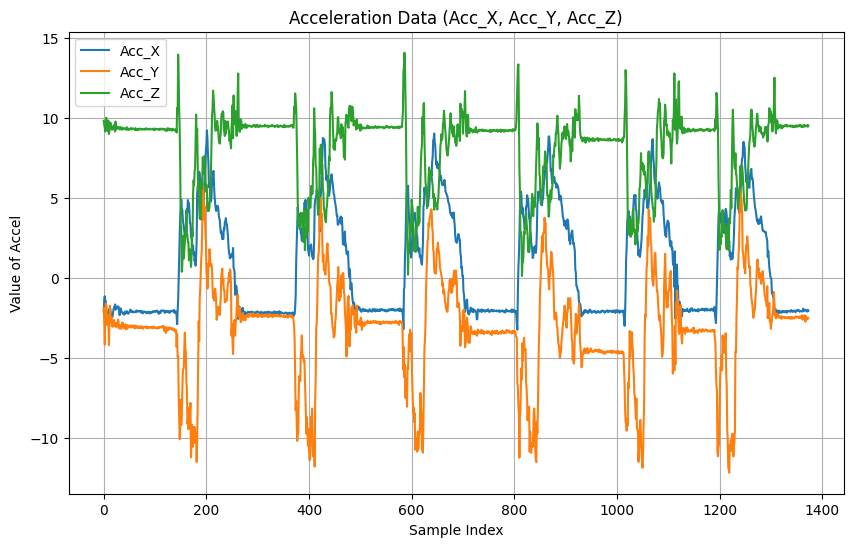

In [ ]:
import matplotlib.pyplot as plt

# acc_tensor를 numpy 배열로 변환 (이미 생성된 acc_tensor 사용)
acc_np = Acc_tensor.numpy()

# 플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(acc_np[:, 0], label='Acc_X')
plt.plot(acc_np[:, 1], label='Acc_Y')
plt.plot(acc_np[:, 2], label='Acc_Z')

plt.xlabel('Sample Index')
plt.ylabel('Value of Accel')
plt.title('Acceleration Data (Acc_X, Acc_Y, Acc_Z)')
plt.legend()
plt.grid(True)
plt.show()


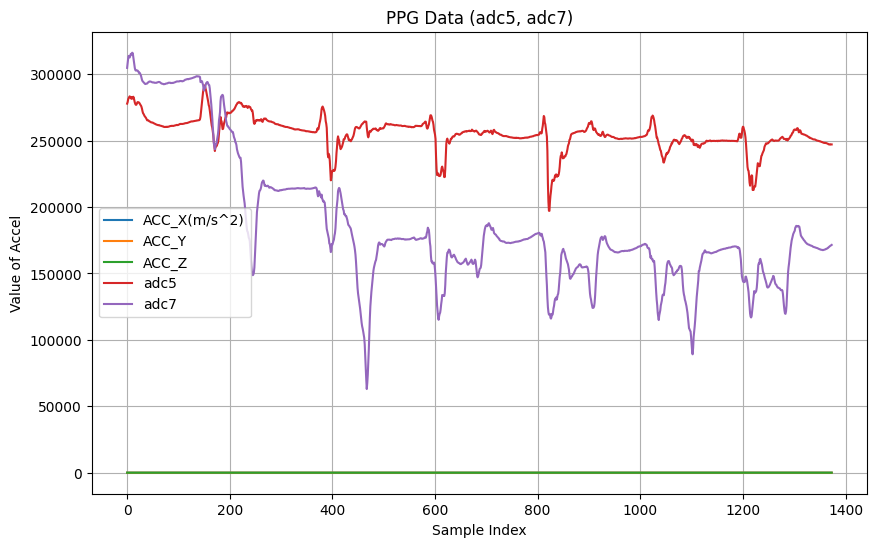

In [ ]:
import matplotlib.pyplot as plt

# acc_tensor를 numpy 배열로 변환 (이미 생성된 acc_tensor 사용)
acc_np = Acc_tensor.numpy()
ppg_np = PPG_tensor.numpy()
# 플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(acc_np[:, 0], label='ACC_X(m/s^2)')
plt.plot(acc_np[:, 1], label='ACC_Y')
plt.plot(acc_np[:, 2], label='ACC_Z')

plt.plot(ppg_np[:, 0], label='adc5')
plt.plot(ppg_np[:, 1], label='adc7')

plt.xlabel('Sample Index')
plt.ylabel('Value of Accel')
plt.title('PPG Data (adc5, adc7)')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

csv_path1 = '/content/drive/MyDrive/watch_ring/left_ring/RingSpO2_Id000000225_Dev516C_NoDev_1740443097210_P09_20250225_092457_HRIBI.csv'
csv_path2 = '/content/drive/MyDrive/watch_ring/left_watch/AFELogging_R945USQU1AXC2_6HHY_1.0.57_20240415-133237.csv'
csv_path3 = '/content/drive/MyDrive/watch_ring/right_watch/AFELogging_R945USQU1AXC2_6H0K_1.0.57_20240415-133022.csv'

# pandas를 사용하여 CSV 파일 읽기 (헤더가 첫번째 행에 있다고 가정)
df1 = pd.read_csv(csv_path1, encoding='utf-8')
df2 = pd.read_csv(csv_path2, encoding='utf-8')
df3 = pd.read_csv(csv_path3, encoding='utf-8')

# 헤더 확인 (DataFrame의 컬럼 이름 출력)
print("CSV 헤더:")
print(df1.columns)
print(df2.columns)
print(df3.columns)

# 'Acc_X', 'Acc_Y', 'Acc_Z' 열을 추출하여 numpy 배열로 변환한 후, torch tensor로 변환 ([N, 3])
Acc_tensor2 = torch.tensor(df2[['Acc_X', 'Acc_Y', 'Acc_Z']].values, dtype=torch.float32)
Acc_tensor3 = torch.tensor(df3[['Acc_X', 'Acc_Y', 'Acc_Z']].values, dtype=torch.float32)
print("Acc shape:", Acc_tensor2.shape)

# 'adc5', 'adc7' 열을 추출하여 numpy 배열로 변환한 후, torch tensor로 변환 ([N, 2])
PPG_tensor2 = torch.tensor(df2[['adc5', 'adc7']].values, dtype=torch.float32)
PPG_tensor3 = torch.tensor(df3[['adc5', 'adc7']].values, dtype=torch.float32)
print("PPG shape:", PPG_tensor3.shape)

CSV 헤더:
Index(['UTCTimestamp_ms', 'SysTick_ms', 'Temperature', 'Acc_X', 'Acc_Y',
       'Acc_Z', 'PPG_G1', 'PPG_G2', 'PPG_R1', 'PPG_R2', 'PPG_IR1', 'PPG_IR2',
       'Number', 'Flag', 'HR'],
      dtype='object')
Index(['Timestamp', 'accuracy', 'Acc_X', 'Acc_Y', 'Acc_Z', 'adc1', 'adc2',
       'adc3', 'adc4', 'adc5', 'adc6', 'adc7', 'adc8', 'adc9', 'adc10',
       'adc11', 'adc12', 'adc13', 'adc14', 'afeMode', 'regMode', 'ecgLeadOff',
       'eFormat', 'womState', 'womReason', 'isNoMove', 'isSleep', 'isAPSleep',
       'isCharging', 'isContinuousHR', 'hrAlgMode', 'hr', 'SpO2', 'afeType',
       'Baro', 'TimeStr', 'UTCTime', 'CalculatedUTCTime'],
      dtype='object')
Index(['Timestamp', 'accuracy', 'Acc_X', 'Acc_Y', 'Acc_Z', 'adc1', 'adc2',
       'adc3', 'adc4', 'adc5', 'adc6', 'adc7', 'adc8', 'adc9', 'adc10',
       'adc11', 'adc12', 'adc13', 'adc14', 'afeMode', 'regMode', 'ecgLeadOff',
       'eFormat', 'womState', 'womReason', 'isNoMove', 'isSleep', 'isAPSleep',
       'isCharging'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

right_watch_path100 = '/content/drive/MyDrive/watch_ring/right_watch/fusion_20240415-133022.csv'
right_watch_path25 =  '/content/drive/MyDrive/watch_ring/right_watch/AFELogging_R945USQU1AXC2_6H0K_1.0.57_20240415-133022.csv'
left_watch_path100 = '/content/drive/MyDrive/watch_ring/left_watch/fusion_20240415-133237.csv'
left_watch_path25 =  '/content/drive/MyDrive/watch_ring/left_watch/AFELogging_R945USQU1AXC2_6HHY_1.0.57_20240415-133237.csv'
left_ring_path = '/content/drive/MyDrive/watch_ring/left_ring/RingSpO2_Id000000225_Dev516C_NoDev_1740443097210_P09_20250225_092457_HRIBI.csv'

df1 = pd.read_csv(right_watch_path100, encoding='utf-8')
df2 = pd.read_csv(right_watch_path25, encoding='utf-8')
df3 = pd.read_csv(left_watch_path100, encoding='utf-8')
df4 = pd.read_csv(left_watch_path25, encoding='utf-8')
df5 = pd.read_csv(left_ring_path, encoding='utf-8')

print("CSV 헤더:")
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)

CSV 헤더:
Index(['SystemDate', 'SystemTime', 'Timestamp_Sensor(us)', 'ACC_X(m/s^2)',
       'ACC_Y', 'ACC_Z', 'GYR_X(degree/sec)', 'GYR_Y', 'GYR_Z', 'PRS(hPa)',
       'Mag_X', 'Mag_Y', 'Mag_Z', 'HR(bpm)', 'Timestamp_GPS(sec)',
       'Latitude(deg)', 'Longitude(deg)', 'Altitude(m)',
       'Accuracy_Horizontal(m)', 'Accuracy_Velocity(m)', 'Speed(km/h)',
       'Latitude_raw(deg)', 'Longitude_raw(deg)', 'Speed_raw(km/h)'],
      dtype='object')
Index(['Timestamp', 'accuracy', 'Acc_X', 'Acc_Y', 'Acc_Z', 'adc1', 'adc2',
       'adc3', 'adc4', 'adc5', 'adc6', 'adc7', 'adc8', 'adc9', 'adc10',
       'adc11', 'adc12', 'adc13', 'adc14', 'afeMode', 'regMode', 'ecgLeadOff',
       'eFormat', 'womState', 'womReason', 'isNoMove', 'isSleep', 'isAPSleep',
       'isCharging', 'isContinuousHR', 'hrAlgMode', 'hr', 'SpO2', 'afeType',
       'Baro', 'TimeStr', 'UTCTime', 'CalculatedUTCTime'],
      dtype='object')
Index(['SystemDate', 'SystemTime', 'Timestamp_Sensor(us)', 'ACC_X(m/s^2)',
       'ACC_Y',

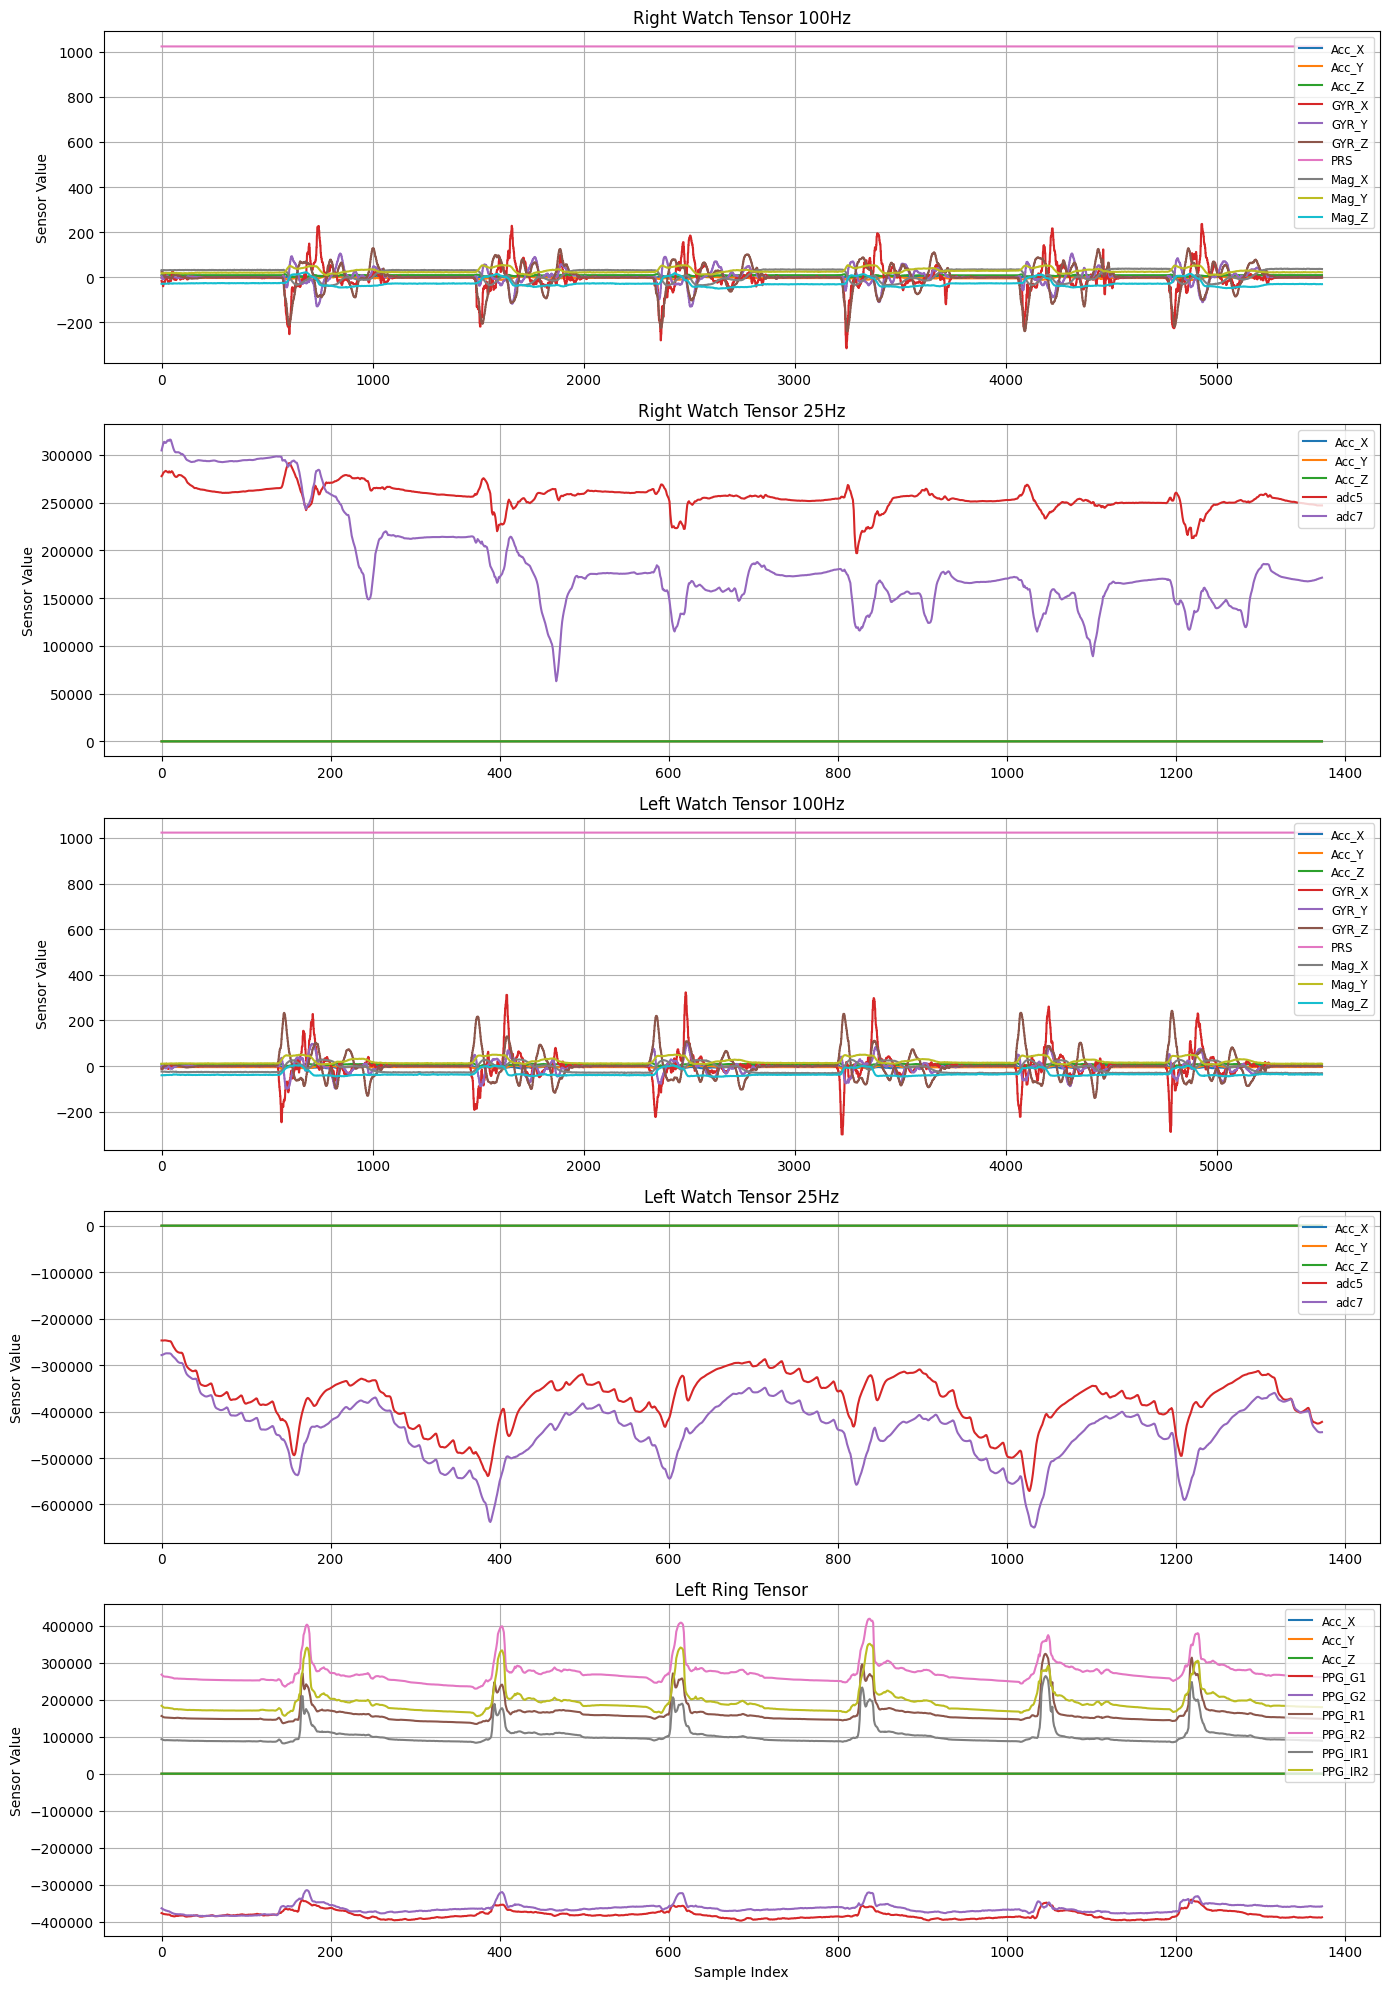

In [11]:
# 'Acc_X', 'Acc_Y', 'Acc_Z' 열을 추출하여 numpy 배열로 변환한 후, torch tensor로 변환 ([N, 3])
right_watch_tensor1 = torch.tensor(df1[['ACC_X(m/s^2)', 'ACC_Y', 'ACC_Z', 'GYR_X(degree/sec)', 'GYR_Y', 'GYR_Z', 'PRS(hPa)', 'Mag_X', 'Mag_Y', 'Mag_Z']].values, dtype=torch.float32)
right_watch_tensor2 = torch.tensor(df2[['Acc_X', 'Acc_Y', 'Acc_Z', 'adc5', 'adc7']].values, dtype=torch.float32)

left_watch_tensor1 = torch.tensor(df3[['ACC_X(m/s^2)', 'ACC_Y', 'ACC_Z', 'GYR_X(degree/sec)', 'GYR_Y', 'GYR_Z', 'PRS(hPa)', 'Mag_X', 'Mag_Y', 'Mag_Z']].values, dtype=torch.float32)
left_watch_tensor2 = torch.tensor(df4[['Acc_X', 'Acc_Y', 'Acc_Z', 'adc5', 'adc7']].values, dtype=torch.float32)

left_ring_tensor = torch.tensor(df5[['Acc_X', 'Acc_Y', 'Acc_Z', 'PPG_G1', 'PPG_G2', 'PPG_R1', 'PPG_R2', 'PPG_IR1', 'PPG_IR2']].values, dtype=torch.float32)

acc_np1 = right_watch_tensor1.numpy()
acc_np2 = right_watch_tensor2.numpy()
acc_np3 = left_watch_tensor1.numpy()
acc_np4 = left_watch_tensor2.numpy()
acc_np5 = left_ring_tensor.numpy()

# subplot 기반 시각화 - torch tensor로부터 numpy 변환 후 시각화
tensors = [acc_np1, acc_np2, acc_np3, acc_np4, acc_np5]
titles = [
    "Right Watch Tensor 100Hz",
    "Right Watch Tensor 25Hz",
    "Left Watch Tensor 100Hz",
    "Left Watch Tensor 25Hz",
    "Left Ring Tensor"
]

# 컬럼 수가 각 텐서마다 다르므로 따로 라벨 지정
labels = [
    ['Acc_X', 'Acc_Y', 'Acc_Z', 'GYR_X', 'GYR_Y', 'GYR_Z', 'PRS', 'Mag_X', 'Mag_Y', 'Mag_Z'],
    ['Acc_X', 'Acc_Y', 'Acc_Z', 'adc5', 'adc7'],
    ['Acc_X', 'Acc_Y', 'Acc_Z', 'GYR_X', 'GYR_Y', 'GYR_Z', 'PRS', 'Mag_X', 'Mag_Y', 'Mag_Z'],
    ['Acc_X', 'Acc_Y', 'Acc_Z', 'adc5', 'adc7'],
    ['Acc_X', 'Acc_Y', 'Acc_Z', 'PPG_G1', 'PPG_G2', 'PPG_R1', 'PPG_R2', 'PPG_IR1', 'PPG_IR2']
]

# 시각화
fig, axs = plt.subplots(5, 1, figsize=(14, 20))

for i, (tensor, title, lbls) in enumerate(zip(tensors, titles, labels)):
    ax = axs[i]
    for j in range(tensor.shape[1]):
        ax.plot(tensor[:, j], label=lbls[j])
    ax.set_title(title)
    ax.set_ylabel('Sensor Value')
    ax.grid(True)
    ax.legend(loc='upper right', fontsize='small')

plt.xlabel('Sample Index')
plt.tight_layout()
plt.show()


In [24]:
import zipfile
import os

# 열고자 하는 ZIP 파일 경로
zip_path = '/content/drive/MyDrive/250409.zip'

# 압축을 풀 디렉토리 경로
extract_dir = '/content/drive/MyDrive/250409'

# 디렉토리 없으면 생성
os.makedirs(extract_dir, exist_ok=True)

# ZIP 열고 추출
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    print("압축 해제 완료! 파일 목록:")
    print(zip_ref.namelist())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/250409.zip'